In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import openpyxl

# 设置支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}  # 用来正常显示中文标签
# 设置学术化的图片风格
sns.set_style("whitegrid", rc=rc)  #设置绘图风格
sns.set_palette("hls")  #设置颜色主题
sns.set_context("paper")  #设置绘图元素缩放比例

In [113]:
data = pd.read_csv('data/data.csv')
data.head()


,City,Year,STA,TIP,ECO,FDI
0,南京市,2006-12-31,65.0,2566.0,40645,151911.0
1,南京市,2007-12-31,51.0,3519.0,46306,196253.0
2,南京市,2008-12-31,188.0,4531.0,51454,237203.0
3,南京市,2009-12-31,89.0,6242.0,56035,239199.0
4,南京市,2010-12-31,141.0,8637.0,66132,281601.0


In [114]:
data['City'] = data['City'].astype('category')
data['Year'] = pd.to_datetime(data['Year'], format='%Y-%m-%d')
data.set_index(['City', 'Year'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 221 entries, ('南京市', Timestamp('2006-12-31 00:00:00')) to ('宿迁市', Timestamp('2022-12-31 00:00:00'))
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STA     221 non-null    float64
 1   TIP     221 non-null    float64
 2   ECO     221 non-null    int64  
 3   FDI     221 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.8 KB


In [115]:
data.index.levels[0]

CategoricalIndex(['南京市', '南通市', '宿迁市', '常州市', '徐州市', '扬州市', '无锡市', '泰州市',
                  '淮安市', '盐城市', '苏州市', '连云港市', '镇江市'],
                 categories=['南京市', '南通市', '宿迁市', '常州市', ..., '盐城市', '苏州市', '连云港市', '镇江市'], ordered=False, dtype='category', name='City')

In [116]:
#单方根检验
from statsmodels.tsa.stattools import adfuller
for i in data.columns:
    result = adfuller(data[i])
    print(i, 'ADF Statistic: %f' % result[0], 'p-value: %f' % result[1])
    if result[1] < 0.05:
        print('数据平稳') 
    else:
        print('数据不平稳')


STA ADF Statistic: -3.432177 p-value: 0.009910
数据平稳
TIP ADF Statistic: -1.706289 p-value: 0.427875
数据不平稳
ECO ADF Statistic: -1.344795 p-value: 0.608438
数据不平稳
FDI ADF Statistic: -2.539984 p-value: 0.106046
数据不平稳


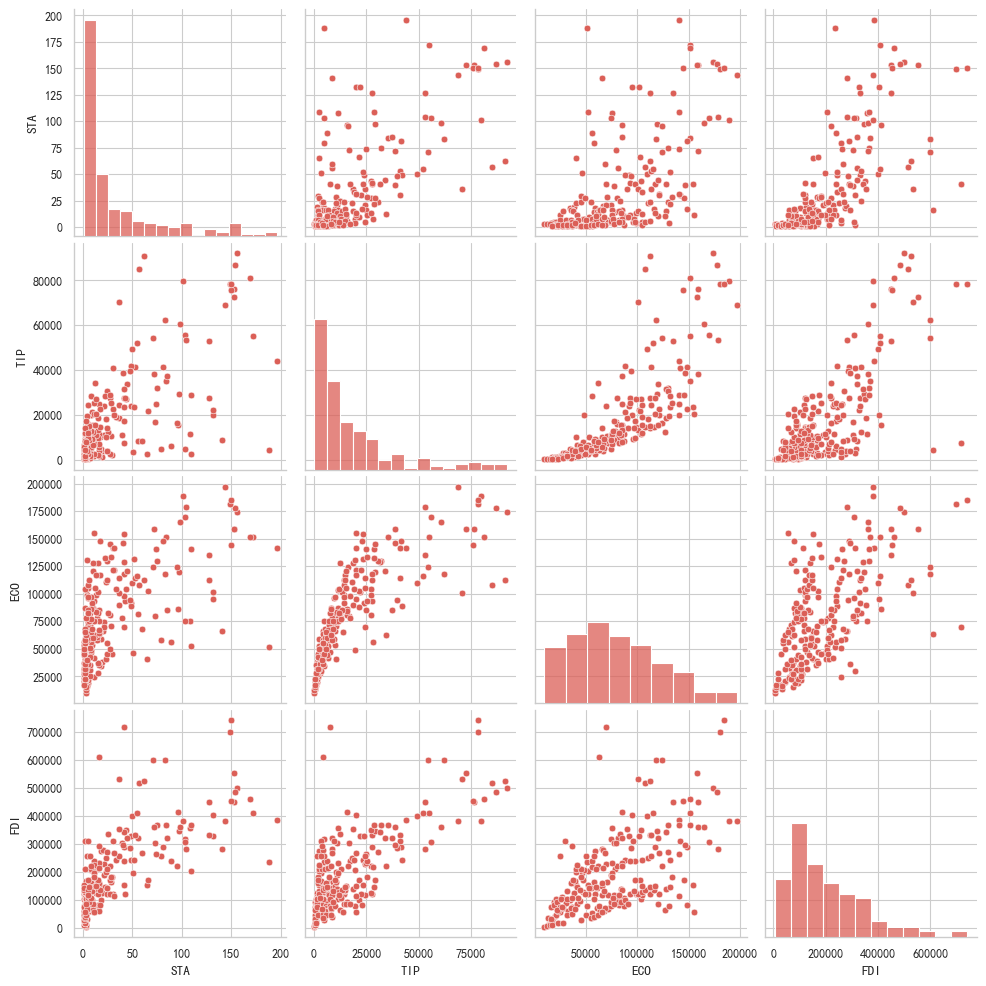

In [117]:
#pairplot
sns.pairplot(data)


In [120]:
#单方根检验
from statsmodels.tsa.stattools import adfuller
for i in range(4):
    result = adfuller(data.iloc[:,i])
    if result[1]<0.05:
        print(data.columns[i],'平稳',result[0],result[1])
    else:
        print(data.columns[i],'非平稳',result[0],result[1])
    

STA 平稳 -3.4321765176961403 0.009909677048572596
TIP 非平稳 -1.706288847686124 0.4278752209996354
ECO 非平稳 -1.3447948855016485 0.6084377557161275
FDI 非平稳 -2.539984341493576 0.10604625759700542


In [119]:
data.to_csv('data/data_val.csv',index=True)